$$H_0: a = 0 => CV(a = 0) \sim \chi^2_{T - 1}$$

$$H_1: a = \hat{a}$$

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.special import kv

In [3]:
import numpy as np
from tqdm import tqdm

In [4]:
a, b, T = 0, 0, 100

In [5]:
def gen_ar(a, T, s = 1):
    X = np.zeros(T)
    
    noises = np.append(np.random.normal(0, np.sqrt(s / (1 - a ** 2))), np.random.normal(0, np.sqrt(s), T - 1))
    
    # generate AR(1)
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = a * X[t - 1] + noises[t]
        
    return X, noises

In [6]:
def gen_ar_laplace(a, T, s = 1):
    X = np.zeros(T)
    
    b = 10
    noises = np.random.laplace(0, b, T)
    noises[0] = np.random.laplace(0, b / np.sqrt(1 - a ** 2), 1)
    
    # generate AR(1)
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = a * X[t - 1] + noises[t]
        
    return X, noises

\begin{align*}C_T^{\text{approx}} &= \sum_{t = 1}^{T-1}\frac{X_t^2}{X_t^2 - \sum_{k = 1}^{T-1}X_k^2}\varepsilon_{t+1}^2\\
&= \sum_{t = 1}^{T-1}\frac{\frac{1}{T - 2}X_t^2}{\frac{1}{T - 2}X_t^2 - \frac{1}{T - 2}\sum_{k = 1}^{T-1}X_k^2}\varepsilon_{t+1}^2\\
&\approx \frac{1 - a^2}{\mathbb{V}\left(\varepsilon\right)} \frac{1}{T - 2}\sum_{t=1}^{T-1}X_t^2\varepsilon_{t+1}^2\end{align*}

As the denominator represented by the variable $$Y = -\frac{1}{T - 2}\sum_{k = 1, k \neq t}^{T-1}X_k^2$$ converges in distribution to $$\frac{\mathbb{V}\left(\varepsilon\right)}{1 - a^2}.$$ So, we only need to investigate $$\frac{1}{T-2}\sum_{t=1}^{T-1}X_t^2\varepsilon_{t+1}^2.$$ 

Alternatively, we can say that $$Y' = \frac{X_t^2}{X_t^2 - \sum_{k = 1}^{T-1}X_k^2}$$ converges in distribution to $1 / T$.

In [88]:
print((X[1:-1] ** 2).mean())

10.439348679138472


In [188]:
a, T, s = 0.9, 100000, 4
X, noises = gen_ar(a, T, s)

## Variable Y, random variable and value
print(1 / T * (np.array(X[1:-1] ** 2) - sum(X[1:-1] ** 2)).mean())
print(- 1 / (1 - a ** 2))

## Approxiamte C_T, as well as the decomposed value, seem close, but is the distribution the same?
print(((X[1:-1] * noises[2:]) ** 2 / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1]))).sum())
print(-(1 - a ** 2) / (s * (T - 2)) * sum((X[1:-1] * noises[2:]) ** 2))
#print(- 1 / (s * (T - 2)) * sum((X[1:-1] * noises[2:]) ** 2))
print(- 1 / (T - 2) * sum((noises[2:]) ** 2))


-21.525783719934758
-5.263157894736843
-4.017279347015994
-4.107567749195775
-4.005420052165455


In [440]:
print(np.mean(X))
print(np.cov(X))
print(2 * 100 / (1 - a ** 2))
print(2 * 100 * (1 / np.sqrt(1 - a ** 2)) ** 2)

-1.064750028599026
2037.1411750254765
2051.282051282051
2051.2820512820504


In [214]:
cv_0 = []
cv_MLE = []
cv_LOOCV_one = []
cv_LOOCV_two = []
cv_MLE_LOOCV_diff = []

cv_MLE_LOOCV_diff_1 = []
cv_MLE_LOOCV_diff_2 = []

a_MLE_list = np.array([])
a_LOOCV_one_list = np.array([])
a_LOOCV_two_list = np.array([])

cv_diff = []
cv_diff_2 = []

h_list = []
h_list_2 = []
h_list_3 = []
h_list_4 = []
h_list_5 = []
h_list_6 = []

sum_lst = []
iters = 25000
a, T, s = 0.5, 1000, 2.0
for _ in tqdm(range(iters)):
    
    ## Generate Data
    X, noises = gen_ar(a, T, s = s)
    # a_est = np.zeros(T)
    
    ## CV-0: Use the true value for a
    cv_0 =  np.linalg.norm(X[2:] - a * X[1:-1], 2) ** 2
    # cv_0.append(1 / (T - 2) * np.linalg.norm(X[2:] - a * X[1:-1], 2) ** 2)
    
#     ## CV-01: Use the MLE value for a
    a_MLE = (np.dot(X[:-1], X[1:])) / (np.dot(X[:-1], X[:-1]))
    cv_MLE = np.linalg.norm(X[2:] - a_MLE * X[1:-1], 2) ** 2
    # cv_MLE.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_MLE * X[1:-1], 2) ** 2)
# #     a_MLE_list = np.append(a_MLE_list, a_MLE)
    
#     ## CV-1: Use the LOOCV-one for a
    a_LOOCV_one = (np.dot(X[:-1], X[1:]) - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[1:-1] * X[1:-1])
    cv_1 = np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2
#     a_LOOCV_one_list = np.append(a_LOOCV_one_list, np.mean(a_LOOCV_one))
    # cv_LOOCV_one.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2)
        
    ## Differences in cv.
    cv_MLE_LOOCV_diff.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_MLE * X[1:-1], 2) ** 2 - 1 / (T - 2) * np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2)
    cv_diff.append(cv_0 - cv_1)     # should be chi squared distributed + CT
    cv_diff_2.append(cv_0 - cv_MLE) # should be chi squared distribted
    
    ## Exact value for CT
    cv_MLE_LOOCV_diff.append(cv_MLE -  cv_1) # value of CT
    # cv_MLE_LOOCV_diff.append((-2 * a_MLE * X[1:-1] * X[2:] + 2 * a_LOOCV_one * X[1:-1] * X[2:]).sum())
    # cv_MLE_LOOCV_diff.append((-2 * (a_MLE - a_LOOCV_one) * X[1:-1] * noises[2:]).sum())
#     cv_MLE_LOOCV_diff_1.append((-2 * (a_MLE - a_LOOCV_one) * (a * noises[:-2] + noises[1:-1]) * noises[2:]).sum())
#     # cv_MLE_LOOCV_diff_1.append((a_MLE * X[1:-1] * noises[2:]).sum())
#     # cv_MLE_LOOCV_diff_2.append((a_LOOCV_one * X[1:-1] * noises[2:]).sum())
    
#     ## CV-2: Use the LOOCV-two for a
#     a_LOOCV_two = (np.dot(X[:-1], X[1:]) - X[:-2] * X[1:-1] - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[:-2] * X[:-2] - X[1:-1] * X[1:-1])
# #     a_LOOCV_two_list = np.append(a_LOOCV_two_list, np.mean(a_LOOCV_two))
# #     cv_LOOCV_two.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_LOOCV_two * X[1:-1], 2) ** 2)
    
    # print(np.array(cv_MLE_LOOCV_diff))
    # h_i = X[1:-1] ** 2 * 1 / (np.dot(X[:-1], X[:-1]))
#     h_list.append(-1 / (1 - h_i) * 1 / (np.dot(X[:-1], X[:-1])) * X[1:-1] * (X[2:] - a_MLE * X[1:-1]))
    # print((-2 / (1 - h_i) * 1 / (np.dot(X[:-1], X[:-1])) * X[1:-1] * (X[2:] - a_MLE * X[1:-1]) * X[1:-1] * noises[2:]).sum())
#     h_list_2.append(- X[1:-1] / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1])) * (X[2:] - a_MLE * X[1:-1]))
    # print((- X[1:-1] / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1])) * (X[2:] - a_MLE * X[1:-1])).sum())
    # print(-2 * (- X[1:-1] / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1])) * ((a - a_MLE) * X[1:-1] + noises[2:]) * X[1:-1] * noises[2:]).sum())
    
#     print((- (X[1:-1] * noises[2:]) ** 2 / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1]))).sum())

    ## Approximate value for CT
    h_list_4.append(((X[1:-1] * noises[2:]) ** 2 / (X[1:-1] ** 2 - np.dot(X[:-1], X[:-1]))).sum())
    
    ## Decomposed value for CT
    h_list_5.append(-(1 - a ** 2) / (s * (T - 2)) * sum((X[1:-1] * noises[2:]) ** 2))
    h_list_6.append(-1 / (T - 2) * ((noises[2:]) ** 2).sum())
    # h_list_3.append(((noises[2:]) ** 2 / (1 - np.dot(X[:-1], X[:-1]))))
    # h_list_4.append(2 * ((noises[2:]) ** 2 / (1 - np.dot(X[:-1], X[:-1]) / X[1:-1] ** 2)).sum())
    # h_list_4.append(noises[2:] ** 2)
    # h_list_5.append((X[1:-1] ** 2 / (- np.dot(X[:-1], X[:-1]))))
    
    # sum_lst.append(-2 * (a_MLE - a_LOOCV_one) * (a * noises[:-2] + noises[1:-1]) * noises[2:])

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:37<00:00, 673.79it/s]


In [647]:
print(h_list_3[0].sum())
print(h_list_4[0].sum())

-0.7506607993760638
-1.000617423775907


In [614]:
print(np.cov(h_list_5[0]))

2.0192435361473394e-12


In [665]:
cov_m = np.cov(np.array(h_list_4).T)

In [675]:
print(sum([np.diag(cov_m, i).sum() for i in range(-T // 1000, T // 1000)])) # incorrect covariance

0.010007904081415005


In [671]:
print(np.diag(cov_m).sum()) # incorrect covariance
print(np.diag(cov_m, 1).sum()) # incorrect covariance
# print(np.diag(cov_m, 2).sum()) # incorrect covariance
# print(np.diag(cov_m, 3).sum()) # incorrect covariance
# print(np.diag(cov_m, 4).sum()) # incorrect covariance
# print(np.diag(cov_m, 5).sum()) # incorrect covariance
# print(np.diag(cov_m, 7000).sum()) # incorrect covariance
# print(np.diag(cov_m, 100).sum()) # incorrect covariance
# print()
# print(np.diag(cov_m).sum() + 2 * (np.diag(cov_m, 1).sum() + np.diag(cov_m, 2).sum() + np.diag(cov_m, 3).sum() + np.diag(cov_m, 4).sum()))
# print(cov_m.sum())          # correct covariance

print(cov_m.sum() - (np.diag(cov_m).sum() + 2 * np.diag(cov_m, 1).sum()))

0.008014187044150373
0.0019937170372646322
-5.255197835503569e-06
-0.006006453028851598


In [521]:
print(np.mean(np.sum(h_list_3, axis = 1)))
print(-1.)
print()
print(np.cov(np.sum(h_list_3, axis = 1)))
print(6 / T)
print()

# print([T ** 2 / 8 * np.cov(h_list) for h_list in np.array(h_list_3)])
# print(np.cov(h_list_3))
# print(6 / T)

-0.999887797858515
-1.0

0.005152789758855513
0.006



In [504]:
print(np.mean(h_list_4[0]))
print(1.)
print()
print(np.mean(h_list_4[0] ** 2))
print(3.)
print()
print(np.cov(h_list_4[0]))
print(2.)
print()
print(np.mean(h_list_5[0]))
print(-1 / T)
print()
print(np.mean(h_list_5[0] ** 2))
print(3 / T ** 2)
print()
print(np.cov(h_list_5[0]))
print(2. / T ** 2)
print()

0.9958851721204163
1.0

2.9626116865008285
3.0

1.970863829304857
2.0

-2.0001327568170902e-05
-2e-05

1.1858073885650968e-09
1.2e-09

7.857700001044669e-10
8e-10



In [505]:
print(np.mean(h_list_3[0]))
print(np.mean(h_list_4[0]) * np.mean(h_list_5[0]))
print(-1 / T)
print()
print(np.cov(h_list_3[0]))
print(np.cov(h_list_4[0] * h_list_5[0]))
print(np.mean(h_list_4[0] ** 2) * np.mean(h_list_5[0] ** 2) - (np.mean(h_list_4[0]) * np.mean(h_list_5[0])) ** 2)
print(3.0 * 3.0 / T ** 2 - 1.0 * 1 / T ** 2)

-1.978413924878489e-05
-1.9919025547864707e-05
-2e-05

3.026274632761782e-09
3.026274632761782e-09
3.1163192485254976e-09
3.2e-09


In [310]:
print(sum(h_list_3[0][h_list_3[0] < np.percentile(h_list_3[0], 5)]))
print(sum((h_list_3[0][h_list_3[0] < np.percentile(h_list_3[0], 50)])))

-1.036812215401381
-1.9658049150514862


In [266]:
print(h_list_3)
# print(h_list_4[0].sum())
print(np.median(h_list_5[0]))
print(min(h_list_5[0]))
# print((h_list_4[0] / h_list_5[0]).sum())

# h_list_5[0].sort()
print(h_list_5[0][900:1000])
print(np.cov(to_hist))
print(np.mean(to_hist))
print(6 / T)

[array([-2.06645103e-08, -3.34626502e-06, -1.61180414e-06, ...,
       -1.84837868e-05, -1.62952926e-06, -3.50236295e-07])]
-220296.59638755827
-1371380611562730.5
[-1.04769880e+06 -4.85038106e+05 -2.04613829e+05 -1.62740683e+05
 -1.25552934e+05 -8.02481576e+05 -1.95671116e+05 -8.65545802e+04
 -5.70068805e+05 -5.84590149e+04 -2.03232177e+05 -4.61824840e+05
 -3.68018517e+08 -2.55581540e+04 -1.01558438e+05 -2.91238907e+04
 -2.49524098e+04 -1.83860229e+05 -1.21108195e+05 -1.31791180e+05
 -5.15001629e+04 -3.82622412e+05 -1.77323154e+06 -1.29211193e+04
 -1.51504818e+05 -1.13157030e+05 -1.61933415e+04 -4.43058709e+04
 -8.91760034e+05 -9.25442789e+04 -3.00657401e+05 -7.22169559e+06
 -3.37821060e+05 -1.27072127e+05 -1.26583900e+05 -6.33781118e+04
 -5.54639012e+04 -1.10064743e+06 -2.58537655e+05 -7.94840314e+04
 -3.02601719e+05 -1.12221341e+06 -6.45513380e+04 -6.04862197e+04
 -2.07850412e+05 -7.43358428e+04 -1.03257419e+05 -2.40490909e+04
 -5.80787667e+05 -1.34499927e+05 -1.19518231e+04 -3.8689

In [768]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})
matplotlib.rcParams['axes.unicode_minus'] = False

In [199]:
print(np.mean(h_list_6))
print(np.mean(h_list_5))
print(np.mean(h_list_4))

print(6 / T)
print(np.cov(h_list_4))

print(12 / T)
print(np.cov(h_list_5))

print(2 / T)
print(np.cov(h_list_6))

-1.000126391765701
-1.000322575224834
-1.0001159493919918
0.006
0.006005937874770502
0.012
0.013239592445245892
0.002
0.00197609855845741


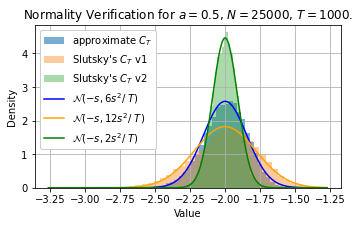

In [215]:
nbins = 45
plt.figure(figsize = (5.5, 3))
plt.grid(True)
# plt.hist(cv_MLE_LOOCV_diff, bins = nbins, density = True, alpha = 0.4, label = r"exact $C_T$");
plt.hist(h_list_4, bins = nbins, density = True, alpha = 0.6, label = r"approximate $C_T$");
plt.hist(h_list_5, bins = nbins, density = True, alpha = 0.4, label = r"Slutsky's $C_T$ v1");
plt.hist(h_list_6, bins = nbins, density = True, alpha = 0.4, label = r"Slutsky's $C_T$ v2");
# plt.hist((np.array(h_list_5) + 1) / 2 - 1, bins = nbins, density = True, alpha = 0.6, label = r"approximate $C_T$");
plt.title(f"Normality Verification for $a = {a}$, $N = {iters}$, $T = {T}$.")
plt.ylabel("Density")
plt.xlabel("Value")
x = np.arange(min(h_list_5), max(h_list_5), (max(h_list_5) - min(h_list_5)) / 1000)
# plt.plot(x, norm.pdf(x, loc = np.mean(cv_MLE_LOOCV_diff), scale = np.std(cv_MLE_LOOCV_diff)), label = r"$Norm$")
plt.plot(x, norm.pdf(x, loc = -s, scale = s * np.sqrt(6  / T)), label = r"$\mathcal{N}(-s, 6s^2 /\ T)$", color = 'blue')
plt.plot(x, norm.pdf(x, loc = -s, scale = s * np.sqrt(12 / T)), label = r"$\mathcal{N}(-s, 12s^2 /\ T)$", color = 'orange')
plt.plot(x, norm.pdf(x, loc = -s, scale = s * np.sqrt(2 / T)), label = r"$\mathcal{N}(-s, 2s^2 /\ T)$", color = 'green')
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [3, 4, 5, 0, 1, 2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], framealpha=1.0)
# plt.savefig("normalhist.pgf")
# plt.legend(framealpha=1.0)

In [540]:
print(T * np.cov(cv_MLE_LOOCV_diff))
print(np.mean(cv_MLE_LOOCV_diff))

2694000.7864352977
-399.8143306979905


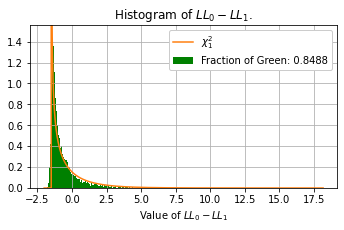

In [235]:
f = plt.figure(figsize = (5.5, 3))
ax = f.add_subplot(111)

plt.title(f"Histogram of $LL_0 - LL_1$.")
plt.xlabel(r"Value of $LL_0 - LL_1$")

#x-axis ranges from 0 to 20 with .001 steps
# to_hist = np.array(np.sum(h_list_3, axis = 1))
# # to_hist = np.array(np.array(h_list_4[0]) / np.array(h_list_5[0]))
# # to_hist = np.array(np.array(h_list_4[0][10000:])) # * np.array(h_list_5[0]))
to_hist = np.array(cv_diff) / np.std(cv_diff)
x = np.arange(min(to_hist), max(to_hist), (max(to_hist) - min(to_hist)) / 10000)

# the histogram of the data
n, bins, patches = ax.hist(to_hist, 1000, density=True, alpha=1.00, facecolor = 'g', label = f"Fraction of Green: {sum(to_hist <= 0) / len(to_hist)}")

# for b, p in zip(bins, patches):
#     if b > 0:
#         p.set_facecolor("red")

max_height = max([r.get_height() for r in patches])
max_bin = np.argmax([r.get_height() for r in patches])

# plt.ylabel('Density')
# plt.xlim(-0.1, 4)
plt.grid(True)

# plt.vlines(0, 0, max_height + 0.1, linestyle = '--', color = 'black', label = "Critical Value")
# plt.plot(x, norm.pdf(x, loc = np.mean(to_hist), scale = np.std(to_hist)), label = r"$Norm$")
# plt.plot(x, norm.pdf(x, loc = 2, scale = np.sqrt(24 / T)), label = r"$Norm$")
plt.plot(x, chi2.pdf(x + 1.5, df = 1) , label = r"$\chi_1^2$")

plt.ylim(0, max_height * 1.1)
plt.legend(framealpha = 1)
# plt.savefig("arhistogram.pgf")

In [528]:
import scipy
print(scipy.stats.mode(cv_diff / np.std(cv_diff)))

ModeResult(mode=array([-1.49650631]), count=array([1]))


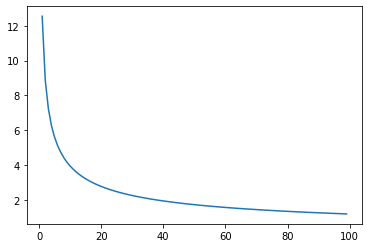

In [491]:
plt.plot(chi2.pdf(np.linspace(0, 10, 100), df = 1))

In [21]:
print(h_list[0].sum())
print(h_list_2[0].sum())
print(h_list_3[0].sum())
print(cv_MLE_LOOCV_diff)

2.425412259232998e-05
-2.425412259232998e-05
0.020992734369273156
[array([-8.61264849e-05, -4.83454233e-04,  2.33453101e-04, ...,
       -5.43042193e-05, -3.64535713e-05, -2.48715753e-07])]


In [207]:
def RCH0(a, T, iters = 10000):
    count = 0

    for _ in tqdm(range(iters)):
    
        ## Generate Data
        X, noises = gen_ar_laplace(a, T)
        a_est = np.zeros(T)
    
        ## CV-0: Use the true value for a
        cv_0 = np.linalg.norm(X[2:] - a * X[1:-1], 2) ** 2
    
        ## CV-1: Use the LOOCV-one for a
        a_LOOCV_one = (np.dot(X[:-1], X[1:]) - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[1:-1] * X[1:-1])
        cv_1 = np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2
    
        count += (cv_0 < cv_1)
    
    return count / iters

RCH0(0.9999, 11)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15967.27it/s]


0.8049

In [562]:
a_range = [0.000, 0.300, 0.600, 0.900] # , 0.950, 0.970, 0.990, 0.995]
T_range = [25, 50, 100, 250] # , 500, 1000]

r = np.zeros((len(a_range), len(T_range)))

iters = 100000
for i, a in enumerate(a_range):
    print("a:", a)
    for j, T in enumerate(T_range):
        r[i][j] = RCH0(a, T, int(iters));
        print("T:", r[i][j])

  1%|▊                                                                        | 1194/100000 [00:00<00:08, 11926.22it/s]

a: 0.0


  1%|▌                                                                          | 827/100000 [00:00<00:12, 8201.10it/s]

T: 0.82548


  0%|▎                                                                          | 409/100000 [00:00<00:24, 4088.13it/s]

T: 0.82952


  0%|▎                                                                          | 362/100000 [00:00<00:27, 3598.47it/s]

T: 0.83149


  1%|▋                                                                          | 978/100000 [00:00<00:10, 9688.12it/s]

T: 0.83772
a: 0.3


  2%|█▏                                                                        | 1596/100000 [00:00<00:12, 8052.65it/s]

T: 0.82609


  1%|▍                                                                          | 519/100000 [00:00<00:19, 5153.63it/s]

T: 0.83271


  1%|▍                                                                          | 590/100000 [00:00<00:34, 2866.81it/s]

T: 0.83558


  1%|▋                                                                          | 873/100000 [00:00<00:11, 8674.48it/s]

T: 0.83727
a: 0.6


  1%|█                                                                         | 1387/100000 [00:00<00:14, 6687.56it/s]

T: 0.82693


  1%|▍                                                                          | 553/100000 [00:00<00:18, 5484.12it/s]

T: 0.83085


  1%|▍                                                                          | 550/100000 [00:00<00:36, 2753.87it/s]

T: 0.8369


  1%|▋                                                                          | 997/100000 [00:00<00:10, 9898.74it/s]

T: 0.83873
a: 0.9


  0%|▏                                                                          | 199/100000 [00:00<00:51, 1931.99it/s]

T: 0.82243


  1%|▋                                                                          | 956/100000 [00:00<00:20, 4784.73it/s]

T: 0.8332


  1%|▌                                                                          | 738/100000 [00:00<00:27, 3674.44it/s]

T: 0.83622


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:29<00:00, 3378.02it/s]

T: 0.83848


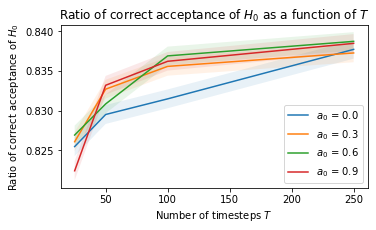

In [565]:
f = plt.figure(figsize = (5.5, 3))

for i, plot in enumerate(r):
    # if i == 1 or i == 2 or i == 5: continue 
    plt.plot(T_range, plot, label = fr"$a_0$ = {np.round(a_range[i], 3)}")
    se = np.sqrt(plot * (1 - plot) / iters)
    plt.fill_between(T_range, plot - se, plot + se, alpha = 0.1)
plt.legend()
plt.xlabel(r"Number of timesteps $T$")
plt.ylabel(r"Ratio of correct acceptance of $H_0$")
plt.title(r"Ratio of correct acceptance of $H_0$ as a function of $T$")
# plt.savefig("rcht.pgf")
plt.show()


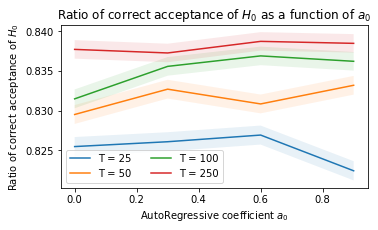

In [566]:
f = plt.figure(figsize = (5.5, 3))

for i, plot in enumerate(r.T):
    plt.plot(a_range, plot, label = f"T = {T_range[i]}")
    se = np.sqrt(plot * (1 - plot) / iters)
    plt.fill_between(a_range, plot - se, plot + se, alpha = 0.1)
plt.ylabel(r"Ratio of correct acceptance of $H_0$")
plt.xlabel(r"AutoRegressive coefficient $a_0$")
plt.title(r"Ratio of correct acceptance of $H_0$ as a function of $a_0$")
plt.legend(ncol = 2)
# plt.savefig("rcha.pgf")
plt.show()

In [101]:
def RCH0_hist(a, T, iters = 10000):
    LL_diff = []

    for _ in tqdm(range(iters)):
    
        ## Generate Data
        X, noises = gen_ar(a, T)
        a_est = np.zeros(T)
    
        ## CV-0: Use the true value for a
        cv_0 = np.linalg.norm(X[2:] - a * X[1:-1], 2) ** 2
    
        ## CV-1: Use the LOOCV-one for a
        a_LOOCV_one = (np.dot(X[:-1], X[1:]) - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[1:-1] * X[1:-1])
        cv_1 = np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2
    
        LL_diff.append(cv_0 - cv_1)
    
    return np.array(LL_diff)

a, T, N = 0.5, 10000, 50000
to_hist = RCH0_hist(a, T, N)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:01<00:00, 92.31it/s]


In [39]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})
matplotlib.rcParams['axes.unicode_minus'] = False

In [234]:
def g(a):
    return np.log(a ** 2)
    return np.linalg.norm(X[1:] - a * X[:-1], 2) ** 2

def der_g(a):
    return 2 / a
    return -np.dot(X[1:] - a * X[:-1], X[:-1])

np.array([g(a) for a in a_list])

array([-1.40951292, -1.33456974, -1.38189928, ..., -1.45606098,
       -1.39783005, -1.34818694])

In [447]:
print(np.cov(to_hist))
print(np.std(to_hist))
print(5 / (np.sqrt(T - 2)))
print(25 / (T - 2))

0.0005027264276165679
0.02241034808272623
0.022360903385149802
0.000500010000200004


In [45]:
print(np.std(cv_diff) * 2 * np.sqrt(T))

9.58933076069249


In [87]:
print(np.cov(np.sqrt(T) * a_diff))
print(np.std(a_diff))
print(4 / ((T)))

6.283934545215489e-11
1.5850291901699828e-07
0.001599360255897641


In [221]:
print(cv_MLE_LOOCV_diff[:10])
print((np.array(cv_MLE) - np.array(cv_LOOCV_one))[:10])

print(np.shape(cv_MLE_LOOCV_diff))

[-4.066328872969776, -3.6380569764821793, -4.133668794199916, -3.7788032460258525, -3.8189915630946762, -4.016831259445375, -3.8623128943576104, -4.595450631676914, -4.065095042879971, -4.1165798488726795]
[-0.00408571 -0.00364833 -0.00414473 -0.00379518 -0.00382646 -0.00402641
 -0.00386946 -0.0046077  -0.00407474 -0.00412777]
(15000,)


In [399]:
print(np.shape(np.array(sum_lst[0])))

(4999,)


In [463]:
print(sum(sum_lst[0][T // 10:]))

-1.8051875608237848


-1.9990626942720595
20000
247118.73521890395


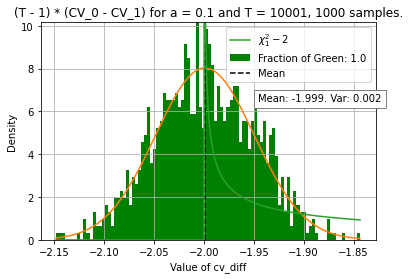

In [480]:
# cv_diff = (T - 2) * (np.array(cv_0) - np.array(cv_LOOCV_one))
# cv_diff = np.array(cv_MLE_LOOCV_diff) # - np.array(cv_MLE_LOOCV_diff_2)
# cv_diff = np.array(cv_MLE) - np.array(cv_LOOCV_one)
cv_diff = np.array(cv_MLE_LOOCV_diff)

a_diff = (np.array(a_MLE_list) - np.array(a_LOOCV_one_list))
# print(len(cv_diff[cv_diff < 0]) / len(cv_diff))

to_hist = cv_diff
# to_hist = np.sqrt((T - 1)) * (g(a) - np.array([g(a) for a in a_list]))
# to_hist = np.array(cv_diff)

f = plt.figure()
ax = f.add_subplot(111)

plt.title(f"(T - 1) * (CV_0 - CV_1) for a = {a} and T = {T}, {iters} samples.")
plt.xlabel(r"Value of cv_diff")

# print(np.mean(to_hist))
# print(np.cov(to_hist))
# print(len(to_hist[to_hist > 0]) / len(to_hist))
# plt.hist(n_list, bins = 100, density = True);

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(min(to_hist), max(to_hist), (max(to_hist) - min(to_hist)) / 1000)

print(np.mean(to_hist))
print(2 * (T - 1))
print(np.cov(to_hist * (T - 1)))

# the histogram of the data


n, bins, patches = ax.hist(to_hist, 100, density=True, alpha=1.00, facecolor = 'g', label = f"Fraction of Green: {sum(to_hist <= 0) / len(to_hist)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")

max_height = max([r.get_height() for r in patches])

plt.ylim(0, max_height + 0.001)
a_T = ((T - (a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2)) / (T)
plt.ylabel('Density')
t = plt.text(0.65, 0.65, f'Mean: {round(to_hist.mean(), 3)}. Var: {round(to_hist.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.vlines(np.mean(to_hist), 0, max_height, linestyle = '--', color = 'black', label = "Mean")
# plt.plot(x, norm.pdf(x, loc = 1, scale = np.sqrt(2 / (T - 1))), label = r"$\mathcal{N}(0, 2 / (T - 1))$")
# plt.plot(x, norm.pdf(x, loc = 2, scale = np.sqrt(1 / (2 * np.sqrt(T)))))
# plt.plot(x, norm.pdf(x, loc = 0, scale = np.sqrt(4 / (T))))
plt.plot(x, norm.pdf(x, loc = to_hist.mean(), scale = np.std(to_hist)))

plt.plot(x, chi2.pdf((x + 2), df = 1), label = r"$\chi_1^2 - 2$")
# plt.plot(x, chi2.pdf(x, df = 1), label = r"$\chi_1^2 - 2$")
# plt.plot(x, chi2.pdf(x , df = 1), label = r"$\chi_1^2 - 2$")
# print(kv(0, x[x > 0] / max(x[x > 0])))
# print(x[x > 0] / max(x[x > 0]))
# plt.plot(x[x > 0],  kv(0, (x[x > 0] / (max(0.4 * x[x > 0])))) * 500, color = 'black')
# plt.plot(-x,  kv(0, x) / 3.14)

plt.legend()


# plt.plot(x, norm.pdf(x, loc = 1, scale = np.sqrt(2 / (T - 1))))

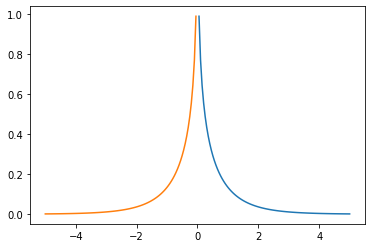

In [251]:
x = np.linspace(0, 5, 100)
# plt.plot(x, norm.pdf(x, loc = 0, scale = 1), label = r"$\chi_1^2 - 2$")
plt.plot(x,  kv(0, x) / 3.14)
plt.plot(-x,  kv(0, x) / 3.14)

In [70]:
a_T = ((T - (a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2)) / (T)
print(a_T)
print(1 / (1 - a ** 2))

5.041002715356926
5.263157894736843


In [44]:
a, T = 0.99, 101
X, noises = gen_ar(a, T)

print(sum(X[:-1] ** 2))
print((T - 1 - (a ** 2 * (1 - a ** (2 * (T - 1))) / (1 - a ** 2))) / (1 - a ** 2))
print((T - 1) / (1 - a ** 2))

10580.288943268897
2881.7794483176885
5025.125628140696


In [719]:
cv_0 = list(cv_0)
cv_1 = list(cv_1)

In [667]:
cv_diff = np.array(cv_0) - np.array(cv_1)
print(len(cv_diff[cv_diff < 0]) / len(cv_diff))

print(np.cov(np.array(cv_0)))
print(np.corrcoef(cv_0, cv_1))

0.8373
0.00039659406661403493
[[1.         0.99989332]
 [0.99989332 1.        ]]


In [687]:
print(1 / (T - 1))

0.02


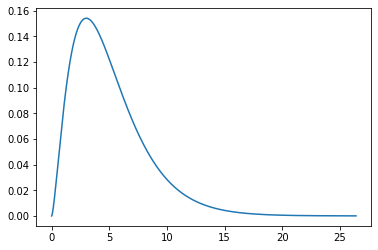

In [38]:
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, max(results), 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=T - 1))

\begin{align*}
 CV(a = \hat{a}) 
 &= \sum_{k = 1}^{T - 1} \left(X_{k+1} - \hat{a}^{-k}X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(X_{k+1} - \frac{\sum_{t = 1}^{T - 1} X_t X_{t + 1} - X_k X_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2} X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(X_{k+1} - \left(a + \frac{\sum_{t = 1}^{T - 1} X_t \varepsilon_{t + 1} - X_k \varepsilon_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2}\right) X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(\varepsilon_{k+1} - \frac{\sum_{t = 1}^{T - 1} X_t \varepsilon_{t + 1} - X_k \varepsilon_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2} X_k\right)^2
\end{align*}

For $a = 0$, the bottom of fraction is chi squared distributed with $T - 2$ degrees of freedom.

Unfortunately, the top of the fraction is a product of two iid standard normal random variables, which is equal to $\pi$ times a Modified Bessel Function of the Second Kind distribution.

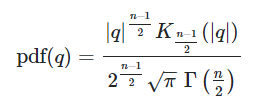

However, this is not correct as the sum of the squared standard normals are dependent.

In [757]:
a, T = 0.9, 100
X, noises = gen_ar(a, T)
a_est = (np.dot(X[:-1], X[1:]) - X[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1])
a_est_2 = a + (np.dot(X[:-1], noises[1:]) - noises[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1])

print(np.linalg.norm(X[1:] - a_est * X[:-1]) ** 2)
print(np.linalg.norm(X[1:] - a_est_2 * X[:-1]) ** 2)
print(np.linalg.norm(noises[1:] - (a_est - a) * X[:-1]) ** 2)
print(np.linalg.norm(noises[1:] - (np.dot(X[:-1], noises[1:]) - noises[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1]) * X[:-1]) ** 2)

136.4286074299501
136.42860742995006
136.42860742995006
136.42860742995006


$$\begin{align*} P(CV(a = 0) < CV(a = \hat{a}) 
&= P\left(\sum_{t = 1}^{T - 1}\varepsilon_{t + 1}^2 < \sum_{t = 1}^{T - 1} \left(\varepsilon_{t + 1} - \hat{a}^{-t} \varepsilon_t\right)^2\right) \\
&= P\left(\sum_{t = 1}^{T - 1}\varepsilon_{t + 1}^2 < \sum_{t = 1}^{T - 1} \left(\varepsilon_{t + 1}^2 - 2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} + \hat{a}^2 \varepsilon_t^2\right)\right) \\
&= P\left(0 < \sum_{t = 1}^{T - 1} \left( - 2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} + \hat{a}^2 \varepsilon_t^2\right)\right) \\
&= P\left(\sum_{t = 1}^{T - 1}2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} < \sum_{t = 1}^{T - 1} \hat{a}^2 \varepsilon_t^2\right) \\
&= P\left(\sum_{t = 1}^{T - 1}2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} - \hat{a}^2 \varepsilon_t^2< 0\right) \\
&= P\left(\sum_{t = 1}^{T - 1}\hat{a}^{-t} \varepsilon_t \left(2\varepsilon_{t + 1} - \hat{a} \varepsilon_t\right)< 0\right) \\
\end{align*}$$


## What we Know

$$\sqrt{T - 1}\left(\hat{a}_{T-1} - a_0\right) \overset{D}{\rightarrow} \mathcal{N}\left(0, \frac{1}{I^*(a)}\right),\qquad \text{where}\ I^*(a) \approx \frac{1}{1 - a^2}$$

\begin{align*}CV(0) &\sim \chi^2_{T-1} \overset{T \rightarrow \infty}{\rightarrow} \mathcal{N}\left(T - 1, 2 \left(T - 1\right)\right) \\
CV(1) &\overset{T \rightarrow \infty}{\rightarrow} \mathcal{N}\left(T - 1, 2 \left(T - 1\right)\right)\end{align*}

Now, the question is, what is their joint distribution?

It seems that $$\mathbf{E}\left[CV(0) - CV(1)\right] \approx \frac{1}{T - 1}.$$

$$\mathbf{V}\left[(T - 1) (CV(0) - CV(1))\right] \approx 2.$$

We have that
\begin{align*}
-I^*(a) 
&= \mathbb{E}_a\left[\frac{\partial^2}{\partial a^2} \log f_a(X)\right] \\
&= \mathbb{E}_a\left[\frac{\partial^2}{\partial a^2} \sum_{t = 2}^T-\frac{1}{2}\left(X_t - aX_{t-1}\right)^2\right]\\
&= \mathbb{E}_a\left[\frac{\partial}{\partial a} \sum_{t = 2}^T\left(X_t - aX_{t-1}\right)\cdot X_{t-1}\right] \\
&= -\mathbb{E}_a\left[\sum_{t = 2}^TX_{t-1}^2\right] \\
&= -\mathbb{E}_a\left[\sum_{t = 1}^{T - 1}X_{t}^2\right]
\end{align*}

Therefore, 
$$I^*(a) = \mathbb{E}_a\left[\sum_{t = 1}^{T - 1}X_{t}^2\right]$$

[1.0000031  1.00002294] [[3.99817995e-05 3.99807733e-05]
 [3.99807733e-05 3.99805517e-05]]
0.7575


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 1.000e+00, 1.200e+01,
        9.000e+00, 1.100e+01, 3.100e+01, 2.500e+01, 3.900e+01, 3.400e+01,
        6.700e+01, 5.900e+01, 8.800e+01, 8.700e+01, 1.120e+02, 1.480e+02,
        1.580e+02, 2.050e+02, 2.490e+02, 2.840e+02, 3.090e+02, 3.580e+02,
        4.100e+02, 4.610e+02, 5.710e+02, 6.210e+02, 6.980e+02, 7.860e+02,
        8.630e+02, 9.430e+02, 9.910e+02, 1.070e+03, 1.146e+03, 1.259e+03,
        1.297e+03, 1.366e+03, 1.420e+03, 1.494e+03, 1.519e+03, 1.599e+03,
        1.563e+03, 1.624e+03, 1.629e+03, 1.668e+03, 1.589e+03, 1.615e+03,
        1.490e+03, 1.451e+03, 1.465e+03, 1.439e+03, 1.306e+03, 1.188e+03,
        1.156e+03, 1.064e+03, 1.036e+03, 9.580e+02, 8.940e+02, 8.330e+02,
        6.820e+02, 6.380e+02, 5.770e+02, 4.850e+02, 4.170e+02, 4.140e+02,
        3.250e+02, 2.840e+02, 2.510e+02, 1.930e+02, 1.840e+02, 1.470e+02,
        1.180e+02, 8.800e+01, 9.700e+0

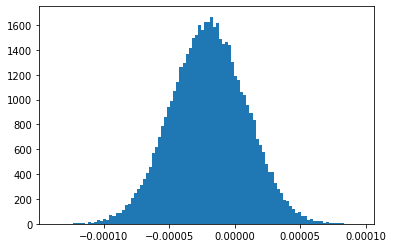

In [745]:
cv_0, cv_1 = np.array(cv_0), np.array(cv_1)
cor = np.corrcoef(cv_0, cv_1)[0][1]

means = np.array([cv_0.mean(), cv_1.mean()])
covs = np.cov(cv_0, cv_1)
print(means, covs)

cv_s = np.random.multivariate_normal(means, covs, 50000)
cv_d = cv_s[:, 0] - cv_s[:, 1]
print(sum(cv_d < 0) / len(cv_d))
plt.hist(cv_s[:, 0] - cv_s[:, 1], bins = 100)

In [735]:
print(np.linalg.det(covs))

-0.9999798716455567
